# Data analysis notebook for EDA project

This is the data analysis notebook part of the EDA project. First of the notebook describes Exploratory Data Analysis pipeline for the Loan data and second part contains loan data analysis and visualisation.

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import numpy as np

In [4]:
#from dataprep.eda import plot as plot_eda

In [5]:
from eda_utils import DataTransform, DataFrameInfo, DataFrameVisualize, DataFrameTransform

In [6]:
df = pd.read_csv("data/loan_payments.csv")

In [7]:
df.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,5 years,MORTGAGE,46000.0,Not Verified,Jan-2021,Current,n,credit_card,19.54,2,Oct-1987,1,5.0,NaN,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,9 years,RENT,50000.0,Not Verified,Jan-2021,Current,n,credit_card,24.20,0,Sep-2001,0,NaN,NaN,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,8 years,MORTGAGE,73913.0,Source Verified,Jan-2021,Fully Paid,n,credit_card,16.92,0,Sep-1998,0,69.0,NaN,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,1 year,RENT,42000.0,Source Verified,Jan-2021,Fully Paid,n,debt_consolidation,35.52,0,Jun-2008,0,74.0,NaN,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,10+ years,MORTGAGE,145000.0,Verified,Jan-2021,Current,n,debt_consolidation,3.33,0,Apr-2002,1,37.0,NaN,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL


Dataprep is an useful tool to automate some of the EDA tasks. Here the plot_eda function is used to plot all columns. 

In [8]:
#plot_eda(df)

Next we instantiate the helper classes that we ll be used throughout the notebook to perfrom data cleaning, data transformatuon and plotting.

In [9]:
data_transform = DataTransform()
dataframe_transform = DataFrameTransform()
data_plot = DataFrameVisualize()
dataframe_info = DataFrameInfo()

Let's find out some information about the datasets. 

In [10]:
df.shape

(54231, 43)

In [11]:
df.describe()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,int_rate,instalment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_amount,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
count,5.423100e+04,5.423100e+04,54231.000000,51224.000000,54231.000000,49062.000000,54231.000000,5.423100e+04,54231.000000,54231.000000,54231.000000,23229.00000,6181.000000,54231.000000,54231.000000,54231.000000,54231.000000,54231.000000,54231.000000,54231.000000,54231.000000,54231.000000,54231.000000,54231.000000,54231.000000,54180.000000,7499.000000,54231.0
mean,7.621797e+06,8.655350e+06,13333.076100,13229.509117,12952.622979,13.507328,400.013953,7.222085e+04,15.867087,0.241799,0.893843,34.01920,74.829154,10.559809,24.168206,2753.964172,2752.568147,12079.208480,11788.946618,9407.048589,2577.757101,0.901512,93.501288,10.859057,3130.706393,0.004208,42.253634,1.0
std,9.571362e+06,1.031281e+07,8082.196709,8019.017599,8099.473527,4.392893,238.920012,5.158934e+04,7.623124,0.706706,1.261421,21.92324,36.137264,4.797169,11.587025,5154.893646,5153.043643,8391.043845,8363.508506,6958.124264,2581.657345,6.215792,630.843636,120.193950,5323.801675,0.070990,21.052360,0.0
min,5.552100e+04,7.069400e+04,500.000000,500.000000,0.000000,5.420000,15.670000,3.300000e+03,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,7.594330e+05,9.587720e+05,7000.000000,7000.000000,6700.000000,10.370000,224.205000,4.500000e+04,10.200000,0.000000,0.000000,15.00000,53.000000,7.000000,16.000000,0.000000,0.000000,5895.210000,5658.815000,4264.350000,889.560000,0.000000,0.000000,0.000000,289.790000,0.000000,26.000000,1.0
50%,7.084590e+06,8.709873e+06,12000.000000,12000.000000,11300.000000,13.160000,347.150000,6.100000e+04,15.600000,0.000000,1.000000,31.00000,87.000000,10.000000,23.000000,0.000000,0.000000,10113.250000,9835.830000,7644.920000,1734.640000,0.000000,0.000000,0.000000,562.670000,0.000000,42.000000,1.0
75%,8.860616e+06,1.052714e+07,18000.000000,18000.000000,18000.000000,16.200000,527.550000,8.600000e+04,21.260000,0.000000,1.000000,49.00000,103.000000,13.000000,31.000000,3397.325000,3394.980000,16272.895000,15978.200000,12505.625000,3323.765000,0.000000,0.000000,0.000000,3738.120000,0.000000,59.000000,1.0
max,3.867612e+07,4.146185e+07,35000.000000,35000.000000,35000.000000,26.060000,1407.010000,2.039784e+06,39.910000,18.000000,33.000000,146.00000,119.000000,53.000000,108.000000,32399.940000,32399.940000,55758.222084,55061.000000,35000.020000,23062.450000,358.680000,27750.000000,7002.190000,36115.200000,4.000000,146.000000,1.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

## Handling of missing values in columns

From this output we can see that there are several columns with missing values. Let's create a list of columns with missing values and find out what percentage of the data are missing in those columns. 


In [13]:
list_of_columns_with_missing_values = dataframe_info.list_all_columns_with_missing_values(df)
list_of_columns_with_missing_values

['funded_amount',
 'term',
 'int_rate',
 'employment_length',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'last_payment_date',
 'next_payment_date',
 'last_credit_pull_date',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog']

Let's find out which are column in this list have numeric values and which ones are having other types. 

In [14]:
dataframe_info.get_column_type_of_list_of_columns(df, list_of_columns_with_missing_values)

Type of funded_amount: float64
Type of term: object
Type of int_rate: float64
Type of employment_length: object
Type of mths_since_last_delinq: float64
Type of mths_since_last_record: float64
Type of last_payment_date: object
Type of next_payment_date: object
Type of last_credit_pull_date: object
Type of collections_12_mths_ex_med: float64
Type of mths_since_last_major_derog: float64


In [15]:
dataframe_info.count_null_values_percentage(df, list_of_columns_with_missing_values)

Percentage of nulls in funded_amount: 0.05544799100145673
Percentage of nulls in term: 0.08799395179878668
Percentage of nulls in int_rate: 0.09531448802345521
Percentage of nulls in employment_length: 0.03905515295679593
Percentage of nulls in mths_since_last_delinq: 0.5716656524865852
Percentage of nulls in mths_since_last_record: 0.8860245984768859
Percentage of nulls in last_payment_date: 0.0013460935627224281
Percentage of nulls in next_payment_date: 0.6012797108664786
Percentage of nulls in last_credit_pull_date: 0.000129077464918589
Percentage of nulls in collections_12_mths_ex_med: 0.0009404215301211485
Percentage of nulls in mths_since_last_major_derog: 0.8617211557965001


columns like "mths_since_last_delinq", "mths_since_last_record", "next_payment_date" and "mths_since_last_major_derog" have over 50% data missing. We will drop those columns. 

In [16]:
df.drop(columns=["mths_since_last_delinq", "mths_since_last_record", "next_payment_date", "mths_since_last_major_derog"], inplace= True)

In [17]:
df.shape

(54231, 39)

Now we check other columns in this list and decide how we can impute those missing values.
Column funded_amount has around 5 % missing values. Lets look at this column. 

<AxesSubplot:xlabel='Count', ylabel='funded_amount'>

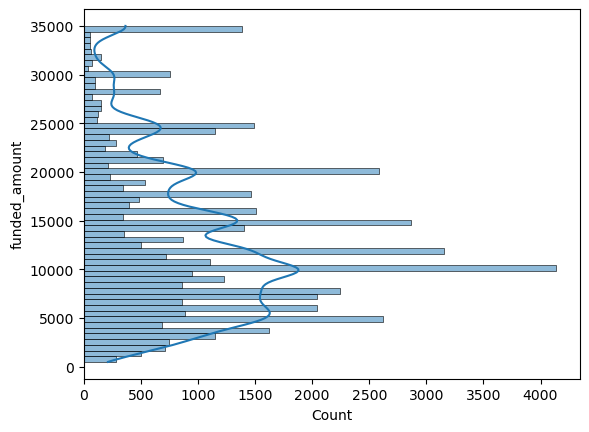

In [18]:
data_plot.plot_histogram(df, "funded_amount")

The data for funded_amount is sufficiently smoothed though it has some spikes. This is the the total amount committed by investors for that loan at that point in time. So there might be some event for those higher deposit. But we can smooth it later. Let's find out mean and median of these column and we will use the median values to fill the missing rows.

In [19]:
dataframe_info.get_df_mean(df, "funded_amount")

mean: 13229.50911682024, median: 12000.0, mode: 10000.0


In [20]:
df = dataframe_transform.fill_null_values_with_median(df, "funded_amount")

In [21]:
len(df["funded_amount"].to_list())

54231

Next "term" column. It has got around 8% data missing and it is a categorical column and has two values. We will remove all the rows that have null values for this column. Also, when we are at it we will remove the word months from the column values and add it to the column name.  

<AxesSubplot:xlabel='term', ylabel='count'>

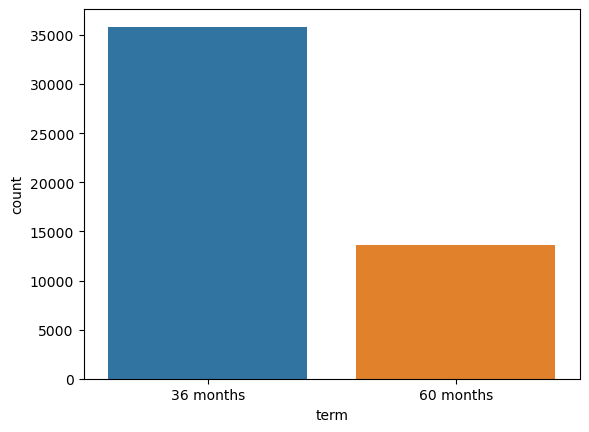

In [22]:
sns.countplot(df, x="term")

In [23]:
df.dropna(subset=['term'], inplace=True)

In [24]:
df.shape

(49459, 39)

In [25]:
df["term"] = df["term"].str.replace("months", "")

In [26]:
df["term"].head()

0    36 
1    36 
2    36 
3    36 
4    36 
Name: term, dtype: object

In [27]:
df = df.rename(columns={"term": "term_in_months"})

We will next look at "int_rate" column. This also seems like normally distributed from the plot above. We will also impute with median values. 

In [28]:
df = dataframe_transform.fill_null_values_with_median(df, "int_rate")

In [29]:
len(df["int_rate"].to_list())

49459

Next we look at 'employment_length' column. This is categorical data and around 3% data are missing. 

<AxesSubplot:title={'center':'employment_length'}, xlabel='Values', ylabel='Probability'>

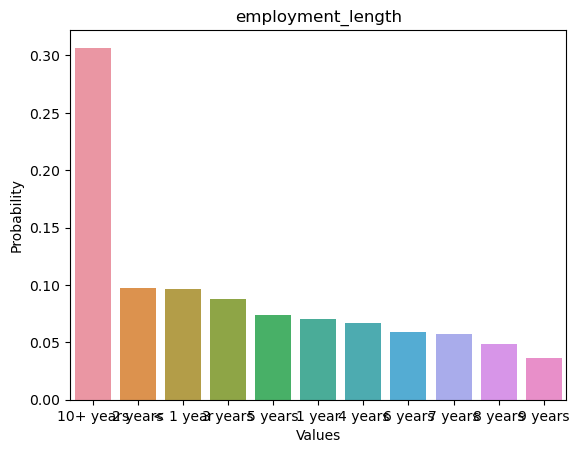

In [30]:
data_plot.plot_prob_distribution(df, "employment_length")

It is probably safe to assume that null values are not randomly distributed. We can check the probablity distribution plot below. So we will fill the missing values with most occuring value which is of employment length of > 10+ years. 

In [31]:
df = dataframe_transform.fill_null_values_with_most_frequent_value(df, "employment_length")

In [32]:
df.shape

(49459, 39)

Lets check the plot again to see if that increases in 10+ years.

<AxesSubplot:title={'center':'employment_length'}, xlabel='Values', ylabel='Probability'>

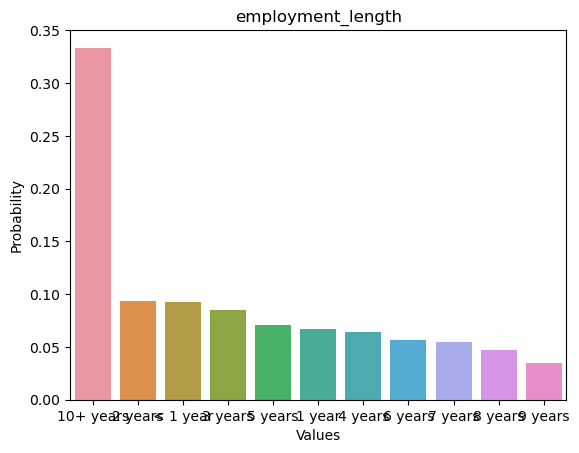

In [33]:
data_plot.plot_prob_distribution(df, "employment_length")

We will also clean the column values by removing years and symbols from it. We will also add 1 to each category so that 0-1 years will be considered as upto 1 years , 1-2 as 2 ans so on. 

In [34]:
df["employment_length"] = df["employment_length"].str.replace("year.*", "").str.replace("< 1", "0").str.replace("+", "").astype(int)

C:\Users\abhik\AppData\Local\Temp\ipykernel_10160\1392218826.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["employment_length"] = df["employment_length"].str.replace("year.*", "").str.replace("< 1", "0").str.replace("+", "").astype(int)
C:\Users\abhik\AppData\Local\Temp\ipykernel_10160\1392218826.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["employment_length"] = df["employment_length"].str.replace("year.*", "").str.replace("< 1", "0").str.replace("+", "").astype(int)


In [35]:
(df["employment_length"].value_counts())

10    16500
2      4614
0      4587
3      4188
5      3512
1      3336
4      3164
6      2800
7      2702
8      2317
9      1739
Name: employment_length, dtype: int64

In [36]:
df["employment_length"] = df["employment_length"] + 1


In [37]:
(df["employment_length"].value_counts())

11    16500
3      4614
1      4587
4      4188
6      3512
2      3336
5      3164
7      2800
8      2702
9      2317
10     1739
Name: employment_length, dtype: int64

Next we will look at column "last_payment_date". This column is a date time column but present in a different format (e.g. May-2021). We will correct the format of this column and the other related columns. There are four remaining columns with same kind of data "last_credit_pull_date", "last_payment_date", "issue_date:" and "earliest_credit_line" (we already dropped "next_payment_date"). 

In [38]:
dt_columns = ["last_credit_pull_date", "last_payment_date", "issue_date","earliest_credit_line",]

In [39]:
df.shape

(49459, 39)

In [40]:
dataframe_info.get_column_type_of_list_of_columns(df, dt_columns)

Type of last_credit_pull_date: object
Type of last_payment_date: object
Type of issue_date: object
Type of earliest_credit_line: object


Now we will change these columns to have proper date time format

In [41]:
df = data_transform.change_date_format(df, column_name="last_credit_pull_date")

In [42]:
df = data_transform.change_date_format(df, column_name="last_payment_date")

In [43]:
df = data_transform.change_date_format(df, column_name="issue_date")

In [44]:
df = data_transform.change_date_format(df, column_name="earliest_credit_line")

Lets check again if the columns have got correct format 

In [45]:
dataframe_info.get_column_type_of_list_of_columns(df, dt_columns)

Type of last_credit_pull_date: datetime64[ns]
Type of last_payment_date: datetime64[ns]
Type of issue_date: datetime64[ns]
Type of earliest_credit_line: datetime64[ns]


We will look at the interval between issue_date and last_payment_date and check if it possible to impute the missing value of last_paymeny_date_column based on that

In [46]:
df[df["last_payment_date"].isna()]["loan_status"].value_counts()

Charged Off                                            61
Does not meet the credit policy. Status:Charged Off     6
Name: loan_status, dtype: int64

We can see that for the rows where the last_payemnt_date is missing the loans have been charged off and a last payemnt date is not avilable. So we will fill these missing dates with place holder date.

In [47]:
df = dataframe_transform.fill_null_values_with_custom_value(df, "last_payment_date", "1900-01-01")

In [48]:
df["last_payment_date"].dtypes

dtype('<M8[ns]')

The othe date tiem column with missing dates is last_credit_pull_date. We will first check the loan status for these loans. 

In [49]:
df[df["last_credit_pull_date"].isna()]["loan_status"].value_counts()

Fully Paid     4
Charged Off    2
Current        1
Name: loan_status, dtype: int64

So there is no apparent trend. For now, we will also impute these missing rows with placeholder date. 

In [50]:
df = dataframe_transform.fill_null_values_with_custom_value(df, "last_credit_pull_date", "1900-01-01")

Last column with missing value is collections_12_mths_ex_med. This is column with floats. Lets plot the column and get more idea. 

In [51]:
df["collections_12_mths_ex_med"].value_counts()

0.0    49217
1.0      180
2.0       13
3.0        1
4.0        1
Name: collections_12_mths_ex_med, dtype: int64

In [52]:
df[df["collections_12_mths_ex_med"].isna()]["loan_status"].value_counts()

Fully Paid                                             22
Does not meet the credit policy. Status:Fully Paid     14
Does not meet the credit policy. Status:Charged Off     8
Charged Off                                             3
Name: loan_status, dtype: int64

<AxesSubplot:title={'center':'collections_12_mths_ex_med'}, xlabel='Values', ylabel='Probability'>

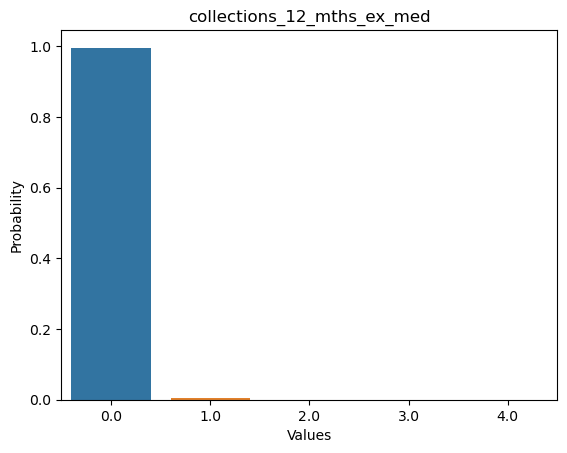

In [53]:
data_plot.plot_prob_distribution(df, "collections_12_mths_ex_med")

Looking at this probability distribution, we will fill the missing rows with 0. 

In [54]:
df = dataframe_transform.fill_null_values_with_most_frequent_value(df, "collections_12_mths_ex_med")

In [55]:
df.shape

(49459, 39)

## Check for skewness

### Numerical columns

Let's list all the numeric column again 

In [56]:
df.skew(numeric_only=True)


id                             2.362249
member_id                      2.198702
loan_amount                    0.803496
funded_amount                  0.869163
funded_amount_inv              0.813451
int_rate                       0.454895
instalment                     0.994859
employment_length             -0.186731
annual_inc                     8.552363
dti                            0.191730
delinq_2yrs                    5.337343
inq_last_6mths                 3.010718
open_accounts                  1.055274
total_accounts                 0.774550
out_prncp                      2.358646
out_prncp_inv                  2.359055
total_payment                  1.270207
total_payment_inv              1.259942
total_rec_prncp                1.260454
total_rec_int                  2.205162
total_rec_late_fee            13.513364
recoveries                    14.506939
collection_recovery_fee       27.683598
last_payment_amount            2.491679
collections_12_mths_ex_med    20.171745


In [57]:
df_copy = df.copy()

In [58]:
df_copy.skew(numeric_only=True)

id                             2.362249
member_id                      2.198702
loan_amount                    0.803496
funded_amount                  0.869163
funded_amount_inv              0.813451
int_rate                       0.454895
instalment                     0.994859
employment_length             -0.186731
annual_inc                     8.552363
dti                            0.191730
delinq_2yrs                    5.337343
inq_last_6mths                 3.010718
open_accounts                  1.055274
total_accounts                 0.774550
out_prncp                      2.358646
out_prncp_inv                  2.359055
total_payment                  1.270207
total_payment_inv              1.259942
total_rec_prncp                1.260454
total_rec_int                  2.205162
total_rec_late_fee            13.513364
recoveries                    14.506939
collection_recovery_fee       27.683598
last_payment_amount            2.491679
collections_12_mths_ex_med    20.171745


In [59]:
for column in dataframe_info.list_all_numeric_columns(df_copy):
    if column not in ["id", "member_id", "policy_code"]:
        if df_copy[column].skew() > 1.0 or df_copy[column].skew() < -1.0:
            print(f"column {column} has skew of {df_copy[column].skew()}")
            df_copy = dataframe_transform.get_log_transform(df_copy, column)   
            print(f"column {column} has skew of {df_copy[column].skew()}") 


column annual_inc has skew of 8.552362848908853
column annual_inc has skew of 0.1402742091640988
column delinq_2yrs has skew of 5.337343046189999
column delinq_2yrs has skew of 5.407202682132009
column inq_last_6mths has skew of 3.0107175918595566
column inq_last_6mths has skew of 1.957030190737895
column open_accounts has skew of 1.055274246862999
column open_accounts has skew of -0.47178555839211517
column out_prncp has skew of 2.358645815455282
column out_prncp has skew of 0.574838469000976
column out_prncp_inv has skew of 2.359055201874398
column out_prncp_inv has skew of 0.5749154444306883
column total_payment has skew of 1.2702067874883722
column total_payment has skew of -1.2793878283719027
column total_payment_inv has skew of 1.25994240982223
column total_payment_inv has skew of -2.948894698586713
column total_rec_prncp has skew of 1.260453747595005
column total_rec_prncp has skew of -1.8869299260360093
column total_rec_int has skew of 2.2051624976092574
column total_rec_int ha

In [60]:
df_copy["collections_12_mths_ex_med"].value_counts()

0.000000    49444
0.693147       13
1.098612        1
1.386294        1
Name: collections_12_mths_ex_med, dtype: int64

In [61]:
df_copy["collections_12_mths_ex_med"].value_counts()

0.000000    49444
0.693147       13
1.098612        1
1.386294        1
Name: collections_12_mths_ex_med, dtype: int64

In [62]:
df_copy_filterd = df_copy.loc[df_copy["collections_12_mths_ex_med"] == 0]

In [63]:
df_copy_filterd.shape


(49444, 39)

<AxesSubplot:>

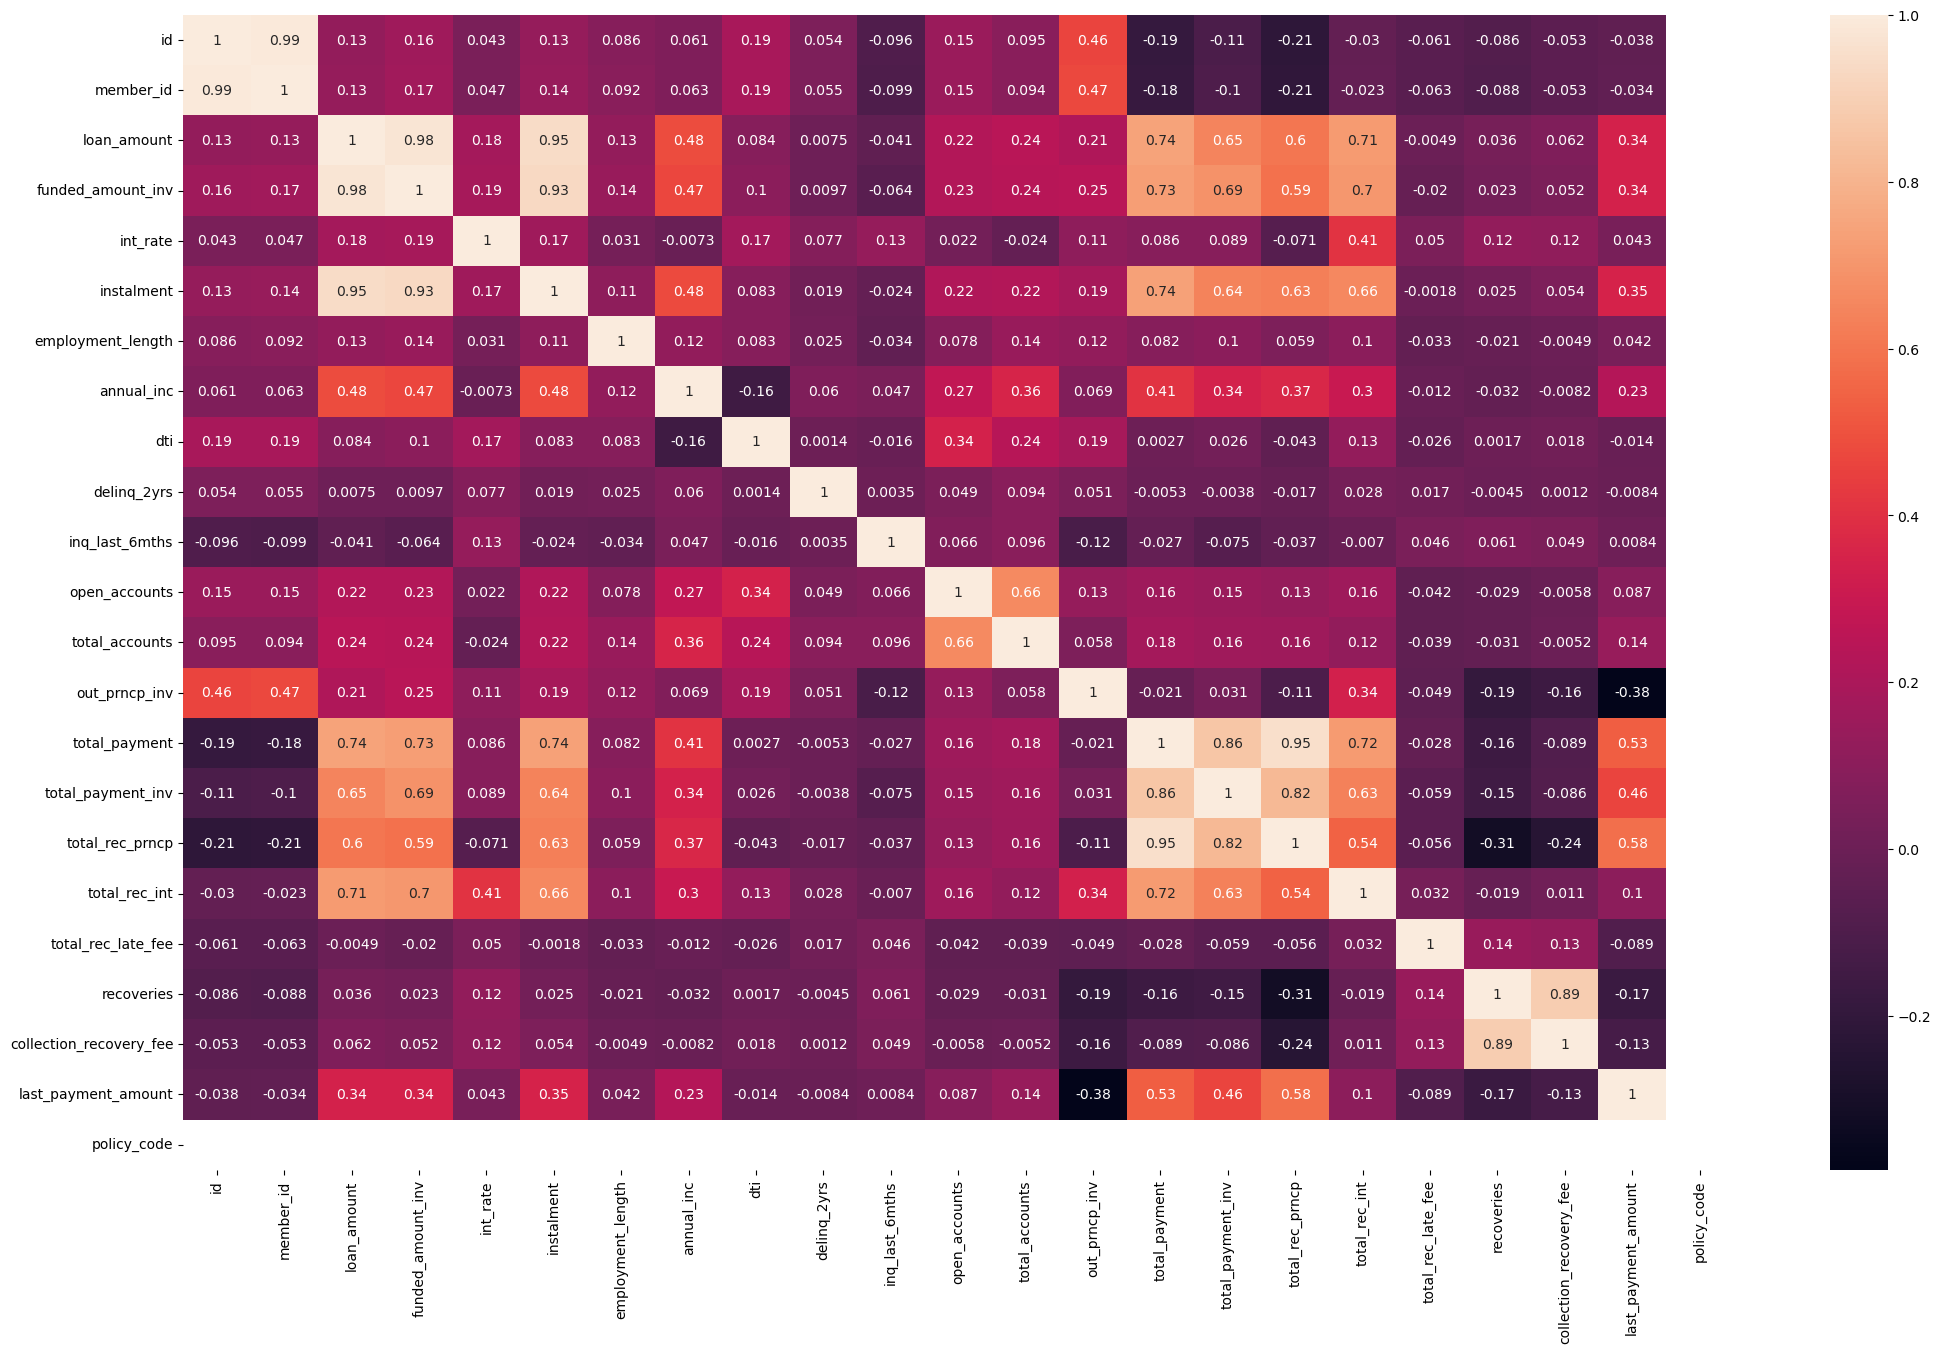

In [76]:
corr_matrix = df_copy_filterd[dataframe_info.list_all_numeric_columns(df_copy_filterd)].corr()
sns.heatmap(corr_matrix, annot=True)

From this we can see columns "out_prncp" and "out_prncp_inv" and "funded_amonut" and "funded_amount_inv" are highly correlated (value over 0.9). We will drop one of these columns from the data set ("out_prncp", and "funded_amount" because the other may have extra information) and also we will also drop "collections_12_mths_ex_med" since that column does not look like have any effect on the outcome. We also can delete one of the columns between "id" and "memner_id" but we will do that later depending on which one we would be using.

In [65]:
df_copy_filterd.drop(columns=["out_prncp", "funded_amount", "collections_12_mths_ex_med"], inplace=True)

C:\Users\abhik\AppData\Local\Temp\ipykernel_10160\3366938864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_filterd.drop(columns=["out_prncp", "funded_amount", "collections_12_mths_ex_med"], inplace=True)


In [66]:
df_copy_filterd.shape

(49444, 36)

## Handling of outliers


### Categorical columns

In [67]:
list_of_categorical_columns = dataframe_info.list_all_categorical_columns(df_copy_filterd)
list_of_categorical_columns

['term_in_months',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'loan_status',
 'payment_plan',
 'purpose',
 'application_type']

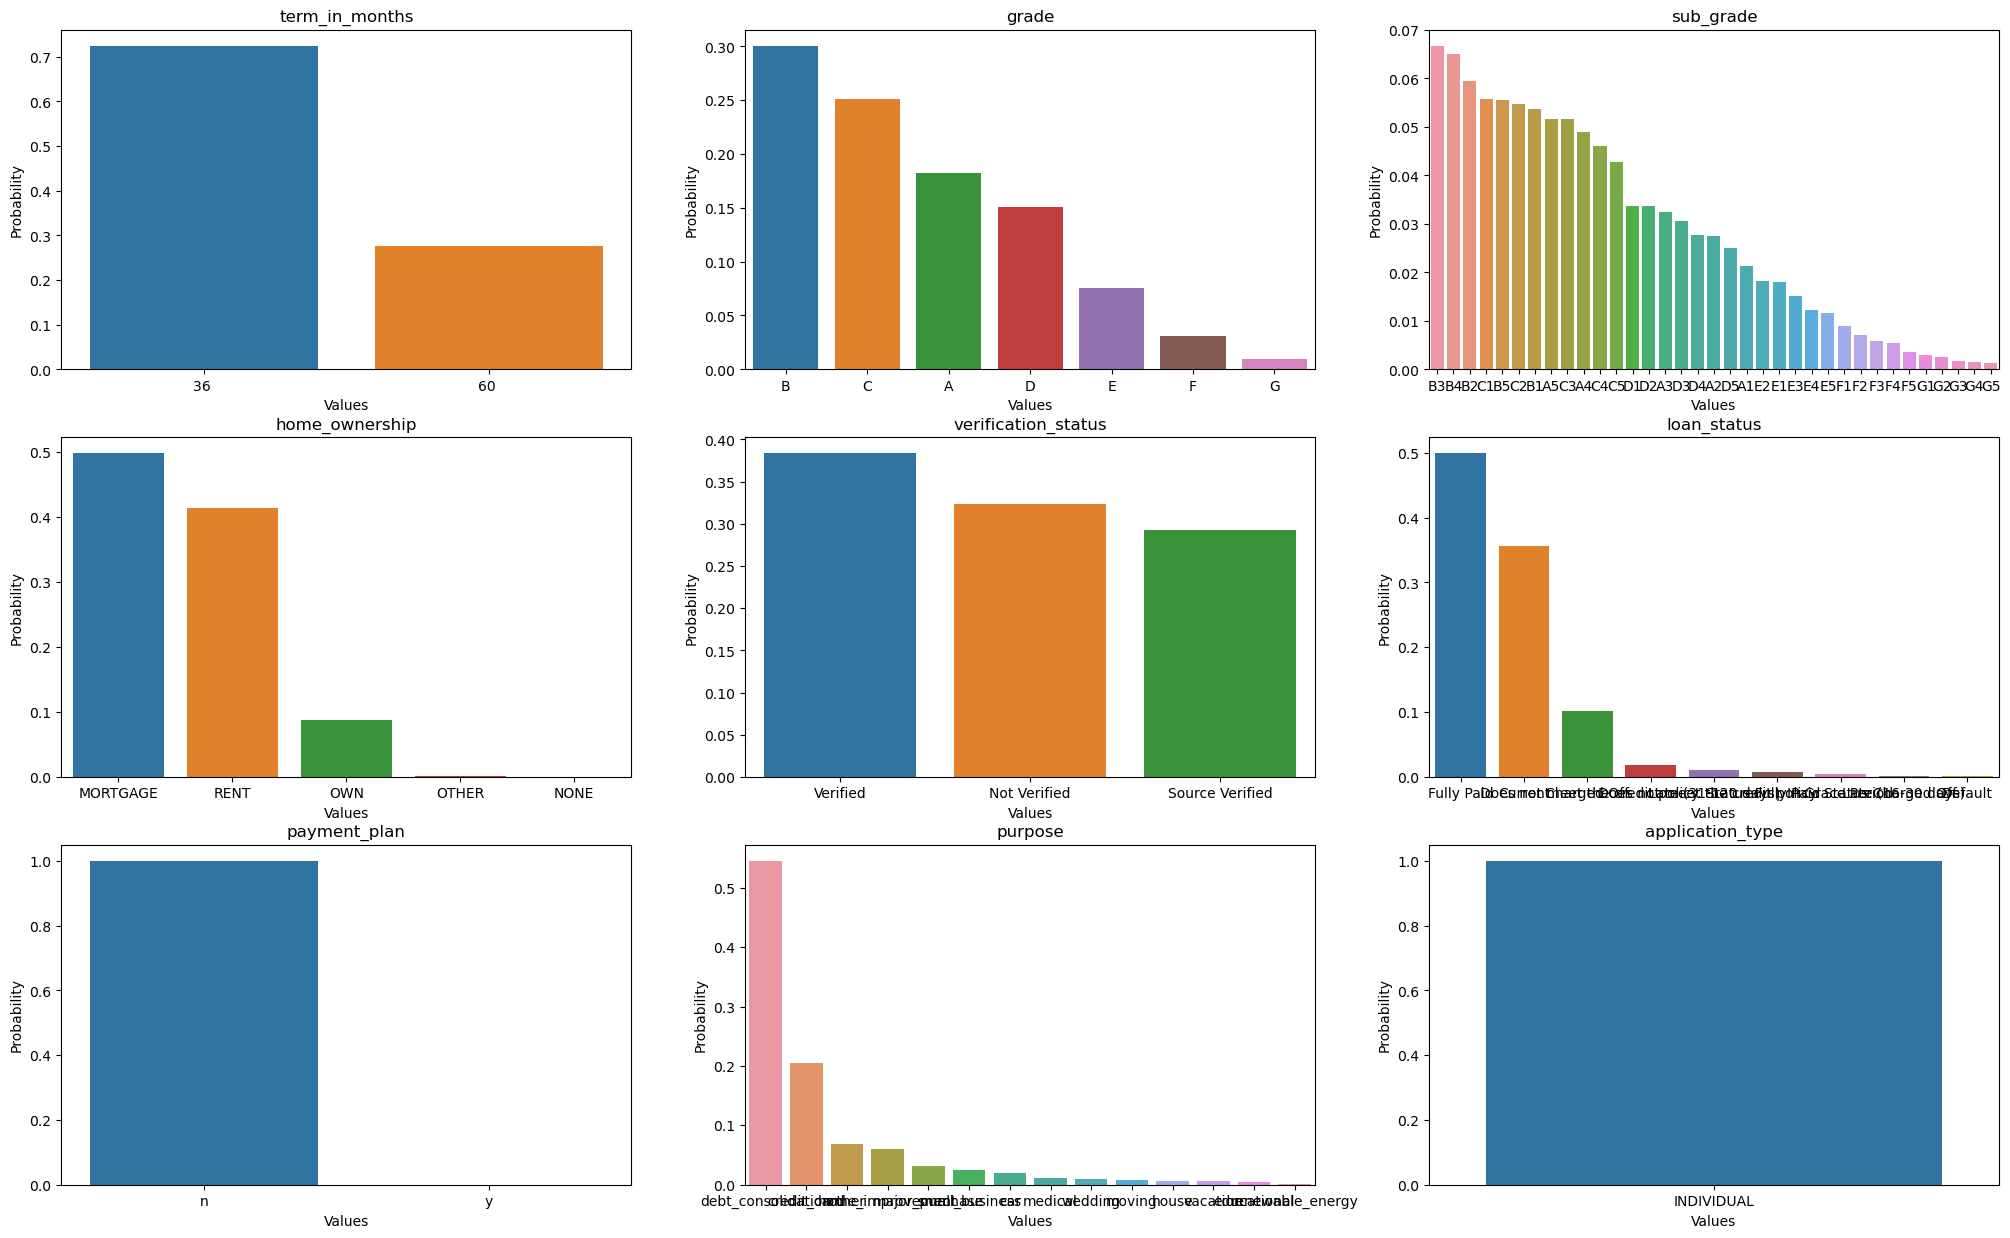

In [68]:
for i, column in enumerate(df_copy_filterd[list_of_categorical_columns], 1):
    plt.rcParams["figure.figsize"] = (25,15)
    plt.subplot(3,3,i)
    data_plot.plot_prob_distribution(df_copy_filterd, column)


The categorical column looks fine. We will leave these columsn for now as it is. 

### Numerical columns

In [69]:
print(len(dataframe_info.list_all_numeric_columns(df_copy_filterd)))

23


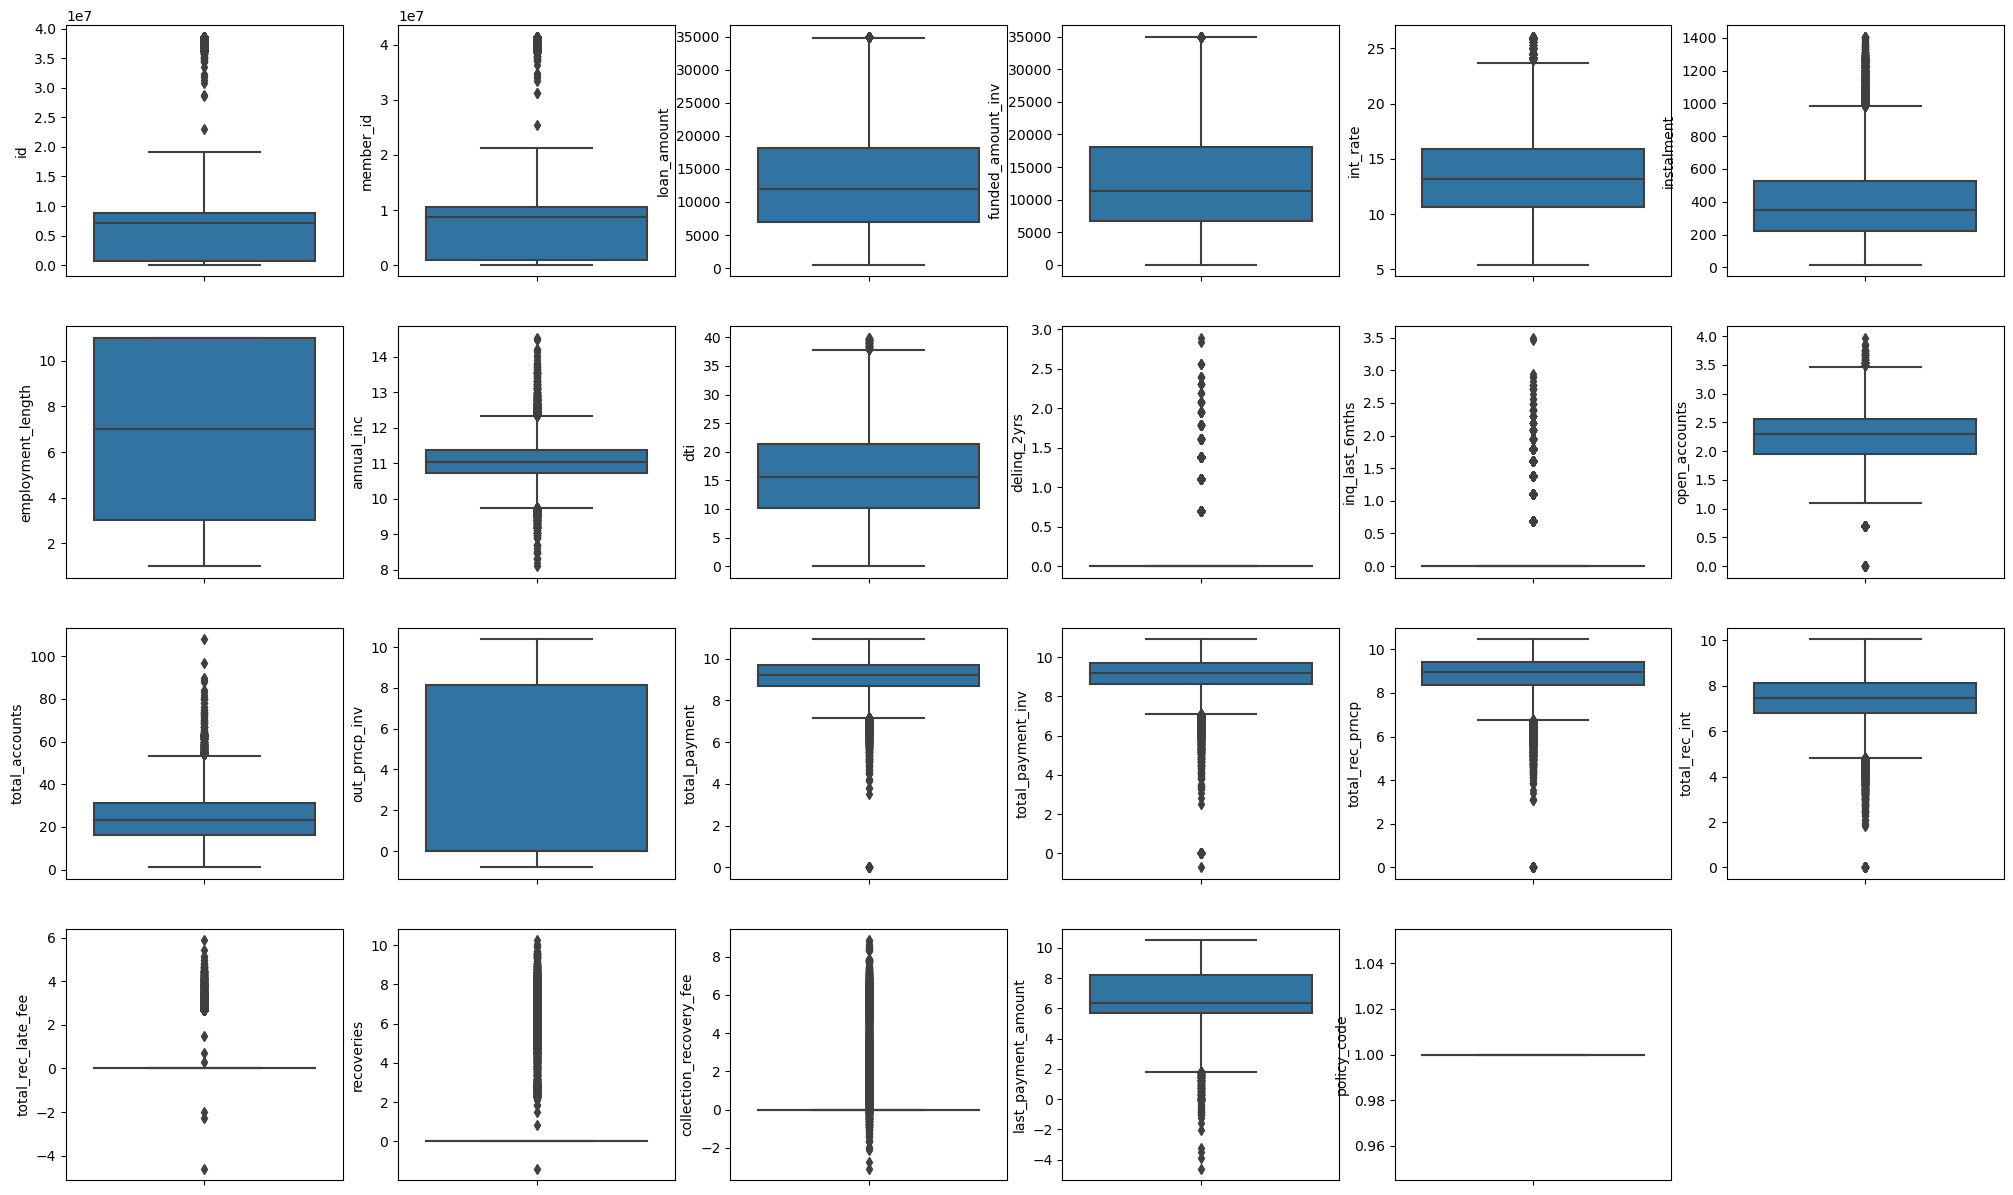

In [70]:
for i, column in enumerate(df_copy_filterd[dataframe_info.list_all_numeric_columns(df_copy_filterd)], 1):
    plt.rcParams["figure.figsize"] = (25,15)
    plt.subplot(4,6,i)
    sns.boxplot(data = df_copy_filterd, y = column)


There are some negative values in columns "total_rec_late_fee", "total_payment_inv", "recoveries", "collection_recovery_fee" and "last_payment_account". This is not possible and clearly a mistake so we will remove those values from these columns. 

In [71]:
for column in ["total_rec_late_fee", "total_payment_inv", "recoveries", "collection_recovery_fee", "last_payment_amount"]:

    df_copy_filterd = df_copy_filterd.loc[df_copy_filterd[column] >= 0]

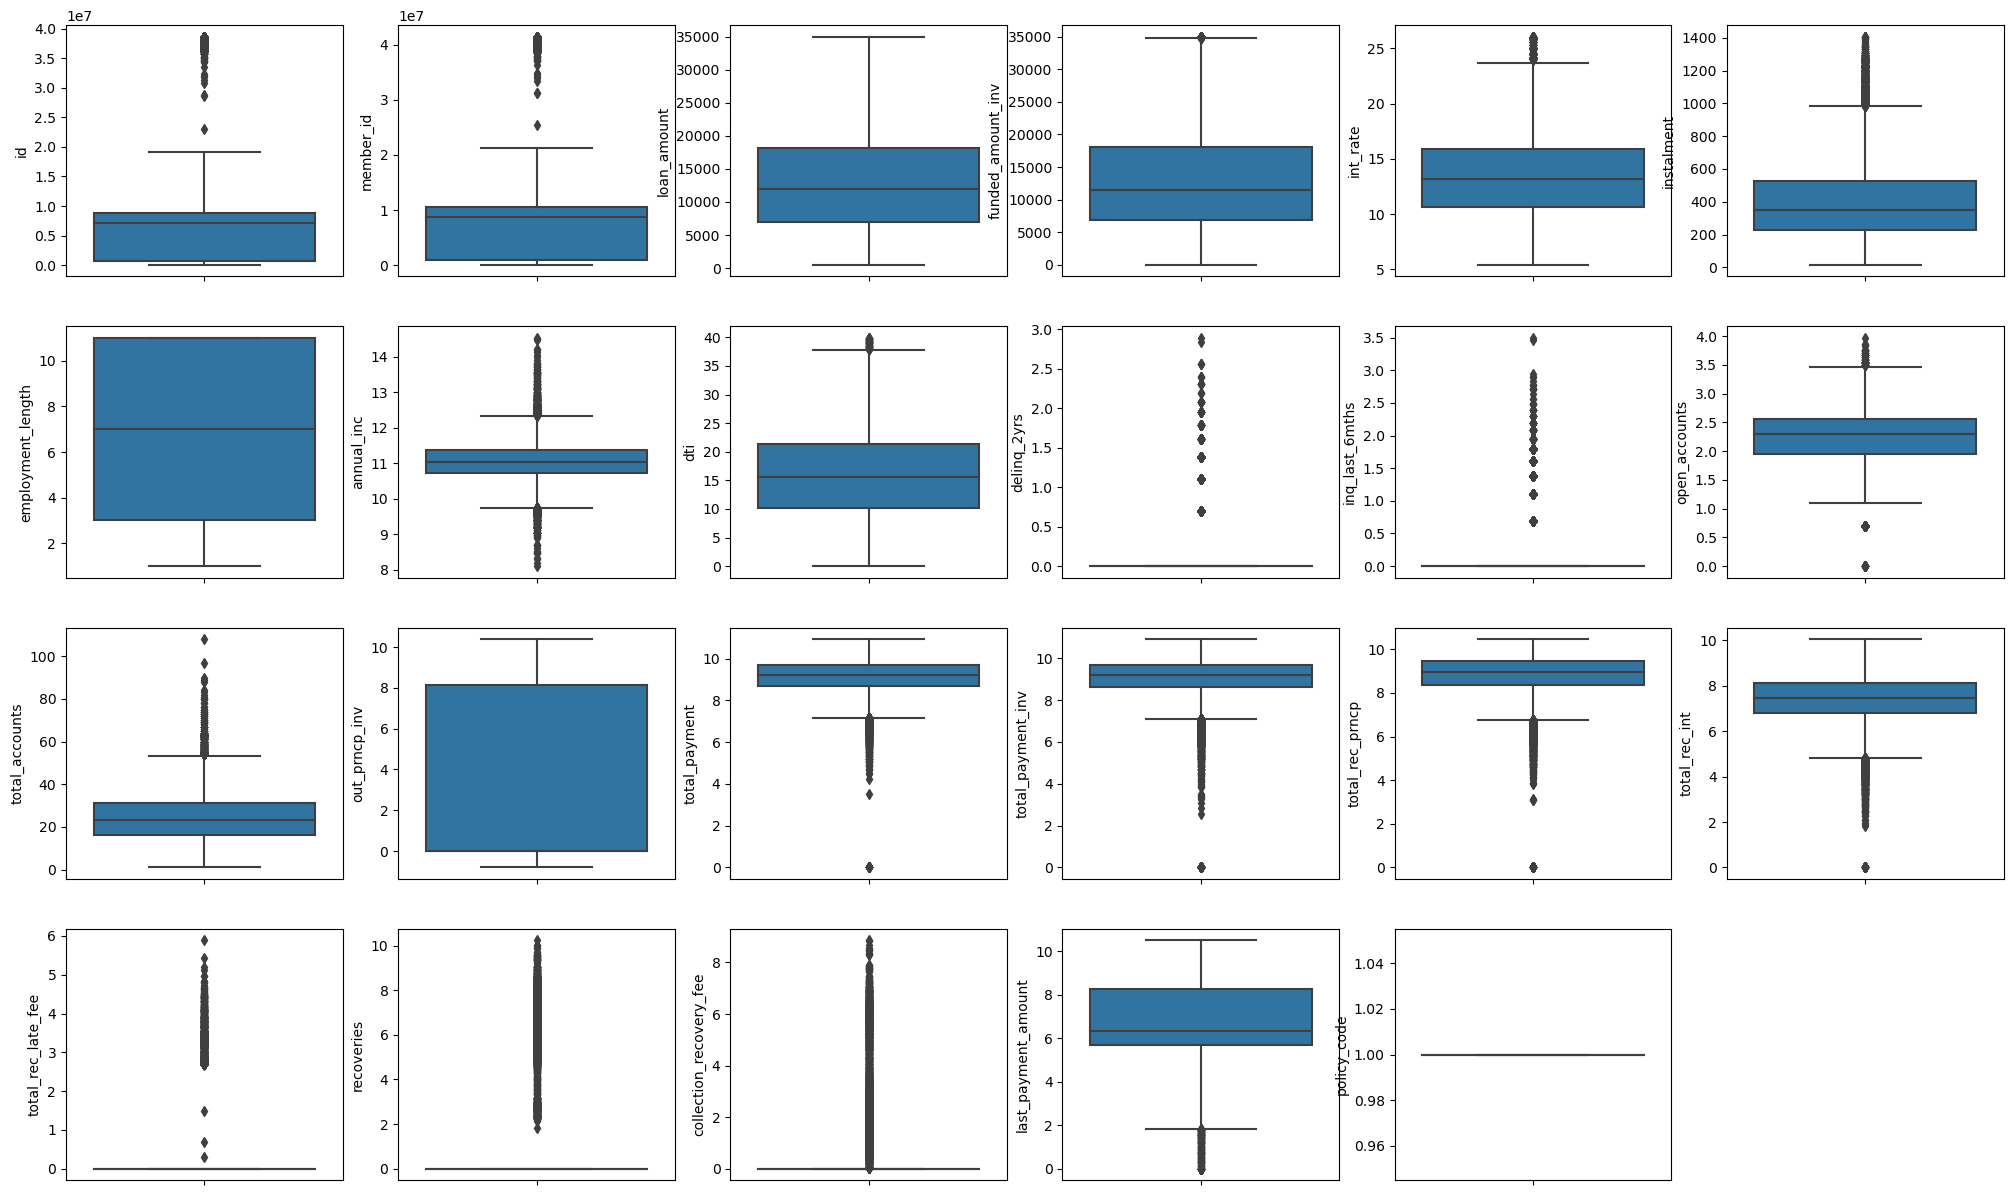

In [72]:
for i, column in enumerate(df_copy_filterd[dataframe_info.list_all_numeric_columns(df_copy_filterd)], 1):
    plt.rcParams["figure.figsize"] = (25,15)
    plt.subplot(4,6,i)
    sns.boxplot(data = df_copy_filterd, y = column)


In [73]:

#for column in ["int_rate", "dti", "open_accounts", "last_payment_amount"]:
#    
#    Q1 = df_copy_filterd[column].quantile(0.25)
#    Q3 = df_copy_filterd[column].quantile(0.75)
#    IQR = Q3 - Q1    #IQR is interquartile range. #

#    filter = df_copy_filterd[(df_copy_filterd[column] < Q1 - 1.5 * IQR)  | (df_copy_filterd[column] > Q3 + 1.5 *IQR)]
#    df_copy_filterd =  df_copy_filterd.drop(filter.index)

In [74]:
for column in ["int_rate", "dti", "open_accounts", "last_payment_amount"]:
    outliers = dataframe_info.calculate_iqr_outliers(df_copy_filterd, column)
    df_copy_filterd =  df_copy_filterd.drop(outliers.index)


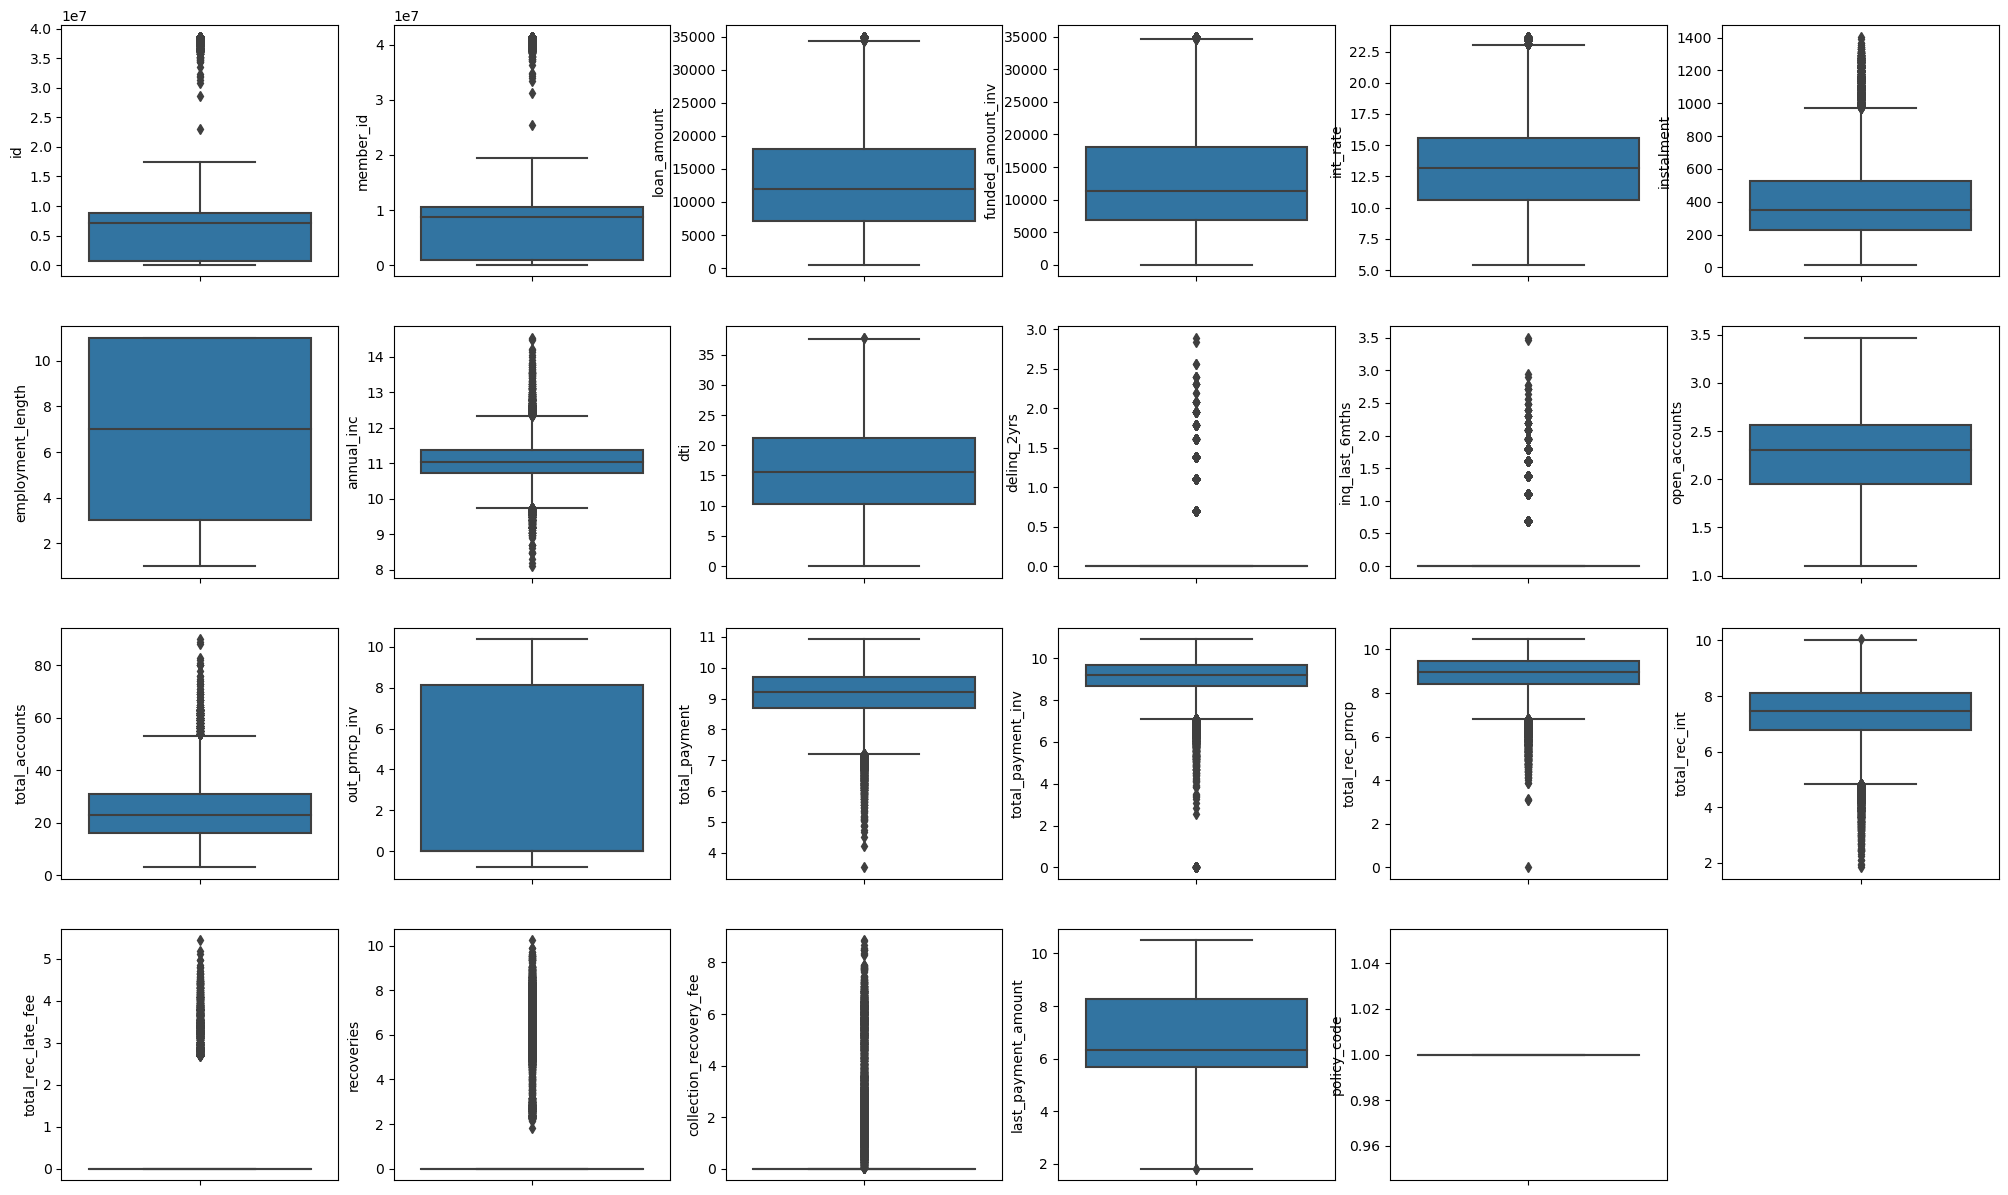

In [75]:
for i, column in enumerate(df_copy_filterd[dataframe_info.list_all_numeric_columns(df_copy_filterd)], 1):
    plt.rcParams["figure.figsize"] = (25,15)
    plt.subplot(4,6,i)
    sns.boxplot(data = df_copy_filterd, y = column)